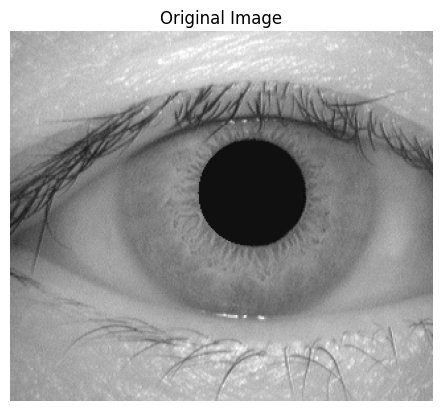

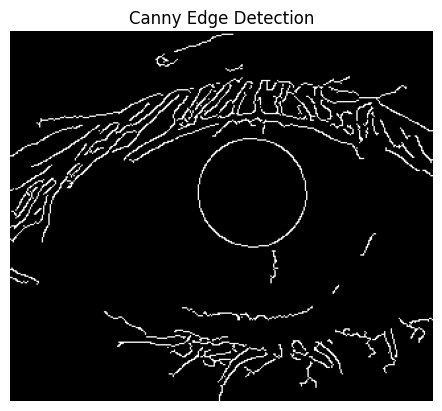

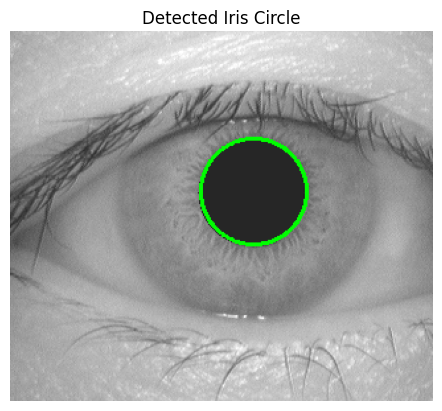

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_iris_and_unwrap(input_path, r_in, r_out):
    # Load the input image
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Input file not found: {input_path}")

    # Display the original image
    plt.figure()
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

# Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(image, (9, 9), 2)

# Edge detection using Canny
    edges = cv2.Canny(blurred, 1, 50)

    # Display the edges
    plt.figure()
    plt.title("Canny Edge Detection")
    plt.imshow(edges, cmap="gray")
    plt.axis("off")
    plt.show()

    # Perform Hough Circle Transform to detect the iris
    circles = cv2.HoughCircles( edges, cv2.HOUGH_GRADIENT,  dp=1.5, minDist=2, param1=50, param2=10, minRadius=r_in,  maxRadius=r_out )

    if circles is not None:
      circles = np.uint16(np.around(circles))
      for circle in circles[0, :1]:  # Process the first detected circle
        center_x, center_y, radius = circle

        # Draw the detected circle (optional, for debugging purposes)
        debug_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.circle(debug_image, (center_x, center_y), radius, (0, 255, 0), 2)
        # cv2.circle(debug_image, (center_x, center_y), 2, (0, 0, 255), 3)

        # Display the detected circle
        plt.figure()
        plt.title("Detected Iris Circle")
        plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()


    else:
        raise ValueError("No circles detected. Please check the input image or adjust parameters.")


r_in = 1 
r_out = 100

input_path = "D:/Downloads/CASIA Iris Image Database (version 1.0)/CASIA Iris Image Database (version 1.0)/001/2/001_2_1.bmp"  # Adjust the path as needed

# Detect iris and unwrap the image
detect_iris_and_unwrap(input_path, r_in, r_out)


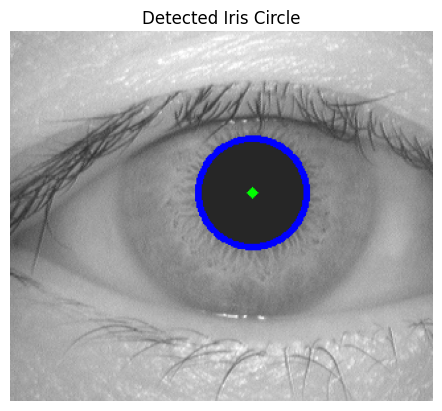

In [23]:
import cv2
import numpy as np

# Load the eye image
image = cv2.imread(input_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve circle detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect the iris (inner and outer circles) using HoughCircles
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,  # Minimum distance between the centers of detected circles
    param1=50,   # Higher threshold for the Canny edge detector
    param2=30,   # Accumulator threshold for the circle centers
    minRadius=10,  # Minimum radius of the circles
    maxRadius=50  # Maximum radius of the circles
)


# If circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Circle center (x, y)
        radius = circle[2]              # Circle radius
        
        # Draw the circle center
        cv2.circle(image, center, 2, (0, 255, 0), 3)
        
        # Draw the circle perimeter
        cv2.circle(image, center, radius, (255, 0, 0), 3)

# Display the result
plt.figure()
plt.title("Detected Iris Circle")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

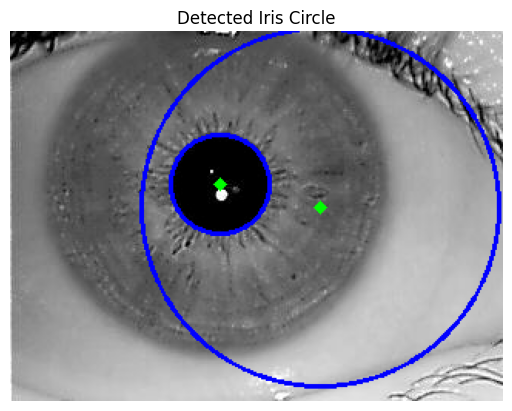

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("D:/Downloads/IITD Database/IITD Database/003/02_L.bmp", cv2.IMREAD_COLOR)


def detect_circles_for_eye(img,dp=1.2, minRad=10, maxRad=50):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (9, 9), 2)
  circles = cv2.HoughCircles(
      blurred,
      cv2.HOUGH_GRADIENT,
      dp=dp,
      minDist=50,  # Minimum distance between the centers of detected circles
      param1=50,   # Higher threshold for the Canny edge detector
      param2=30,   # Accumulator threshold for the circle centers
      minRadius=minRad,  
      maxRadius=maxRad 
    )
  
  circle_detail = ()
  
  if circles is not None or len(circles) == 1:
    circles = np.uint16(np.around(circles))
    circle=circles[0][0]
    center = (circle[0], circle[1])
    radius = circle[2]  
    circle_detail = (center,radius )
    cv2.circle(img, center, 2, (0, 255, 0), 3)
    cv2.circle(img, center, radius, (255, 0, 0), 2)
    # cv2.circle(img, center, 93, (255, 0, 0), 1)
  return circles , circle_detail


pupil = detect_circles_for_eye(image,dp=2.5,minRad= 50,maxRad= 0)
outer = detect_circles_for_eye(image,minRad= 10,maxRad= 50)


  


plt.figure()
plt.title("Detected Iris Circle")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [2]:
def get_iris_eye(img,dp=1.2, minRad=10, maxRad=50, given_center=None ):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (9, 9), 2)
  circles = cv2.HoughCircles(
      blurred,
      cv2.HOUGH_GRADIENT,
      dp=dp,
      minDist=50,  # Minimum distance between the centers of detected circles
      param1=50,   # Higher threshold for the Canny edge detector
      param2=30,   # Accumulator threshold for the circle centers
      minRadius=minRad,  
      maxRadius=maxRad 
    )
  
  circle_detail = ()
  
  if circles is not None or len(circles) == 1:
    circles = np.uint16(np.around(circles))
    circle=circles[0][0]
    center =  (circle[0], circle[1]) if given_center == None else given_center
    radius = circle[2]  
    circle_detail = (center,radius )
    # cv2.circle(img, center, 2, (0, 255, 0), 3)
    cv2.circle(img, center, radius, (255, 0, 0), 1)
    # cv2.circle(img, center, 93, (255, 0, 0), 1)
  return img , circle_detail



def polar_transform(img, center, inner_radius, outer_radius, width=360, height=80):
    """
    Converts the circular iris region into a normalized rectangular strip.

    Args:
    - img: Input grayscale eye image.
    - center: Tuple (x, y) representing the iris center.
    - inner_radius: Inner boundary of the iris.
    - outer_radius: Outer boundary of the iris.
    - width: Output width (default = 360 for full 360°).
    - height: Output height (default = 80 pixels).

    Returns:
    - unwrapped iris image (rectangular).
    """

    # Create arrays for angles and radial distances
    theta = np.linspace(0, 2 * np.pi, width)  # 360° angles
    r = np.linspace(inner_radius, outer_radius, height)  # Radial values

    # Create mesh grid for polar coordinates
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # Compute Cartesian coordinates
    X = np.outer(r, cos_theta) + center[0]
    Y = np.outer(r, sin_theta) + center[1]

    # Convert coordinates to float32 for OpenCV remap
    X = X.astype(np.float32)
    Y = Y.astype(np.float32)

    # Apply remapping to get the unwrapped iris
    unwrapped_iris = cv2.remap(img, X, Y, interpolation=cv2.INTER_LINEAR)

    return unwrapped_iris



def get_output(img):
  image = img.copy()
  image , pupil = get_iris_eye(image,minRad= 10,maxRad= 50)
  image , iris  = get_iris_eye(image,dp=2.5,minRad= 50,maxRad= 0, given_center= pupil[0])

  normalized_image = polar_transform(img,pupil[0] , pupil[1] , iris[1])
  

  return normalized_image , image,  pupil , iris 


  


((148, 119), 35)
((148, 119), 121)


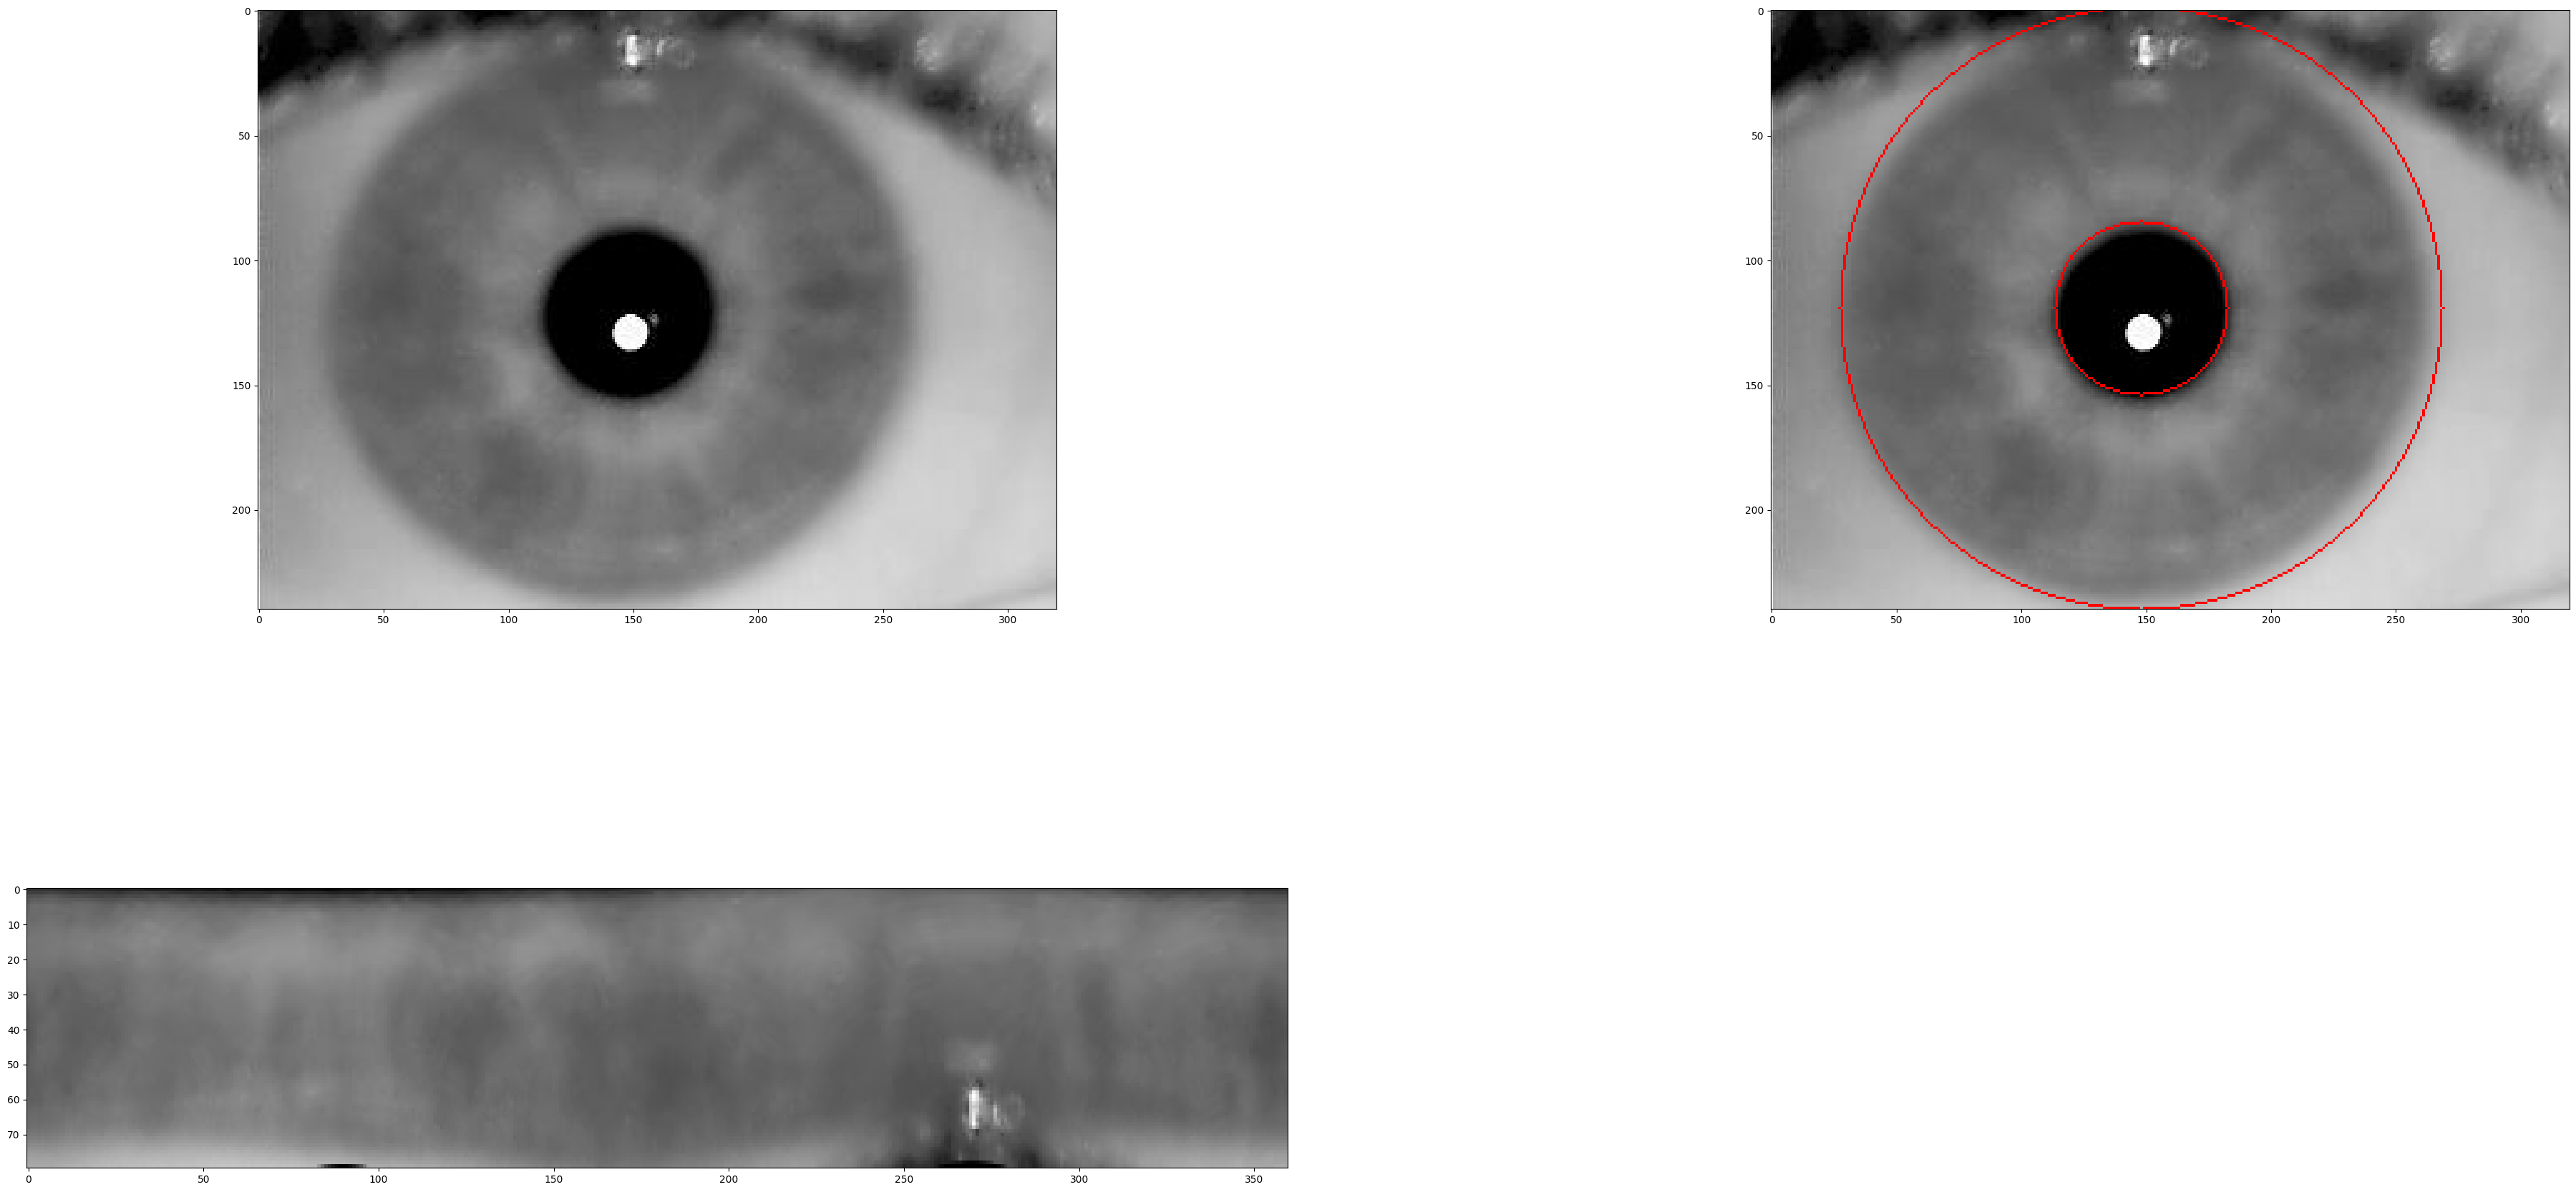

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



image = cv2.imread("D:/Downloads/IITD Database/IITD Database/003/01_L.bmp", cv2.IMREAD_COLOR)

plt.figure(figsize=(50,50))

plt.subplot(4,2,1)
plt.imshow(image)

norm , out , pupil , iris = get_output(image)

plt.subplot(4,2,2)
plt.imshow(out)

print(pupil)
print(iris)


plt.subplot(4,2,3)
plt.imshow(norm)

01_L.bmp
02_L.bmp
03_L.bmp
04_L.bmp
05_L.bmp
06_L.bmp
07_L.bmp
08_L.bmp
09_L.bmp
10_L.bmp


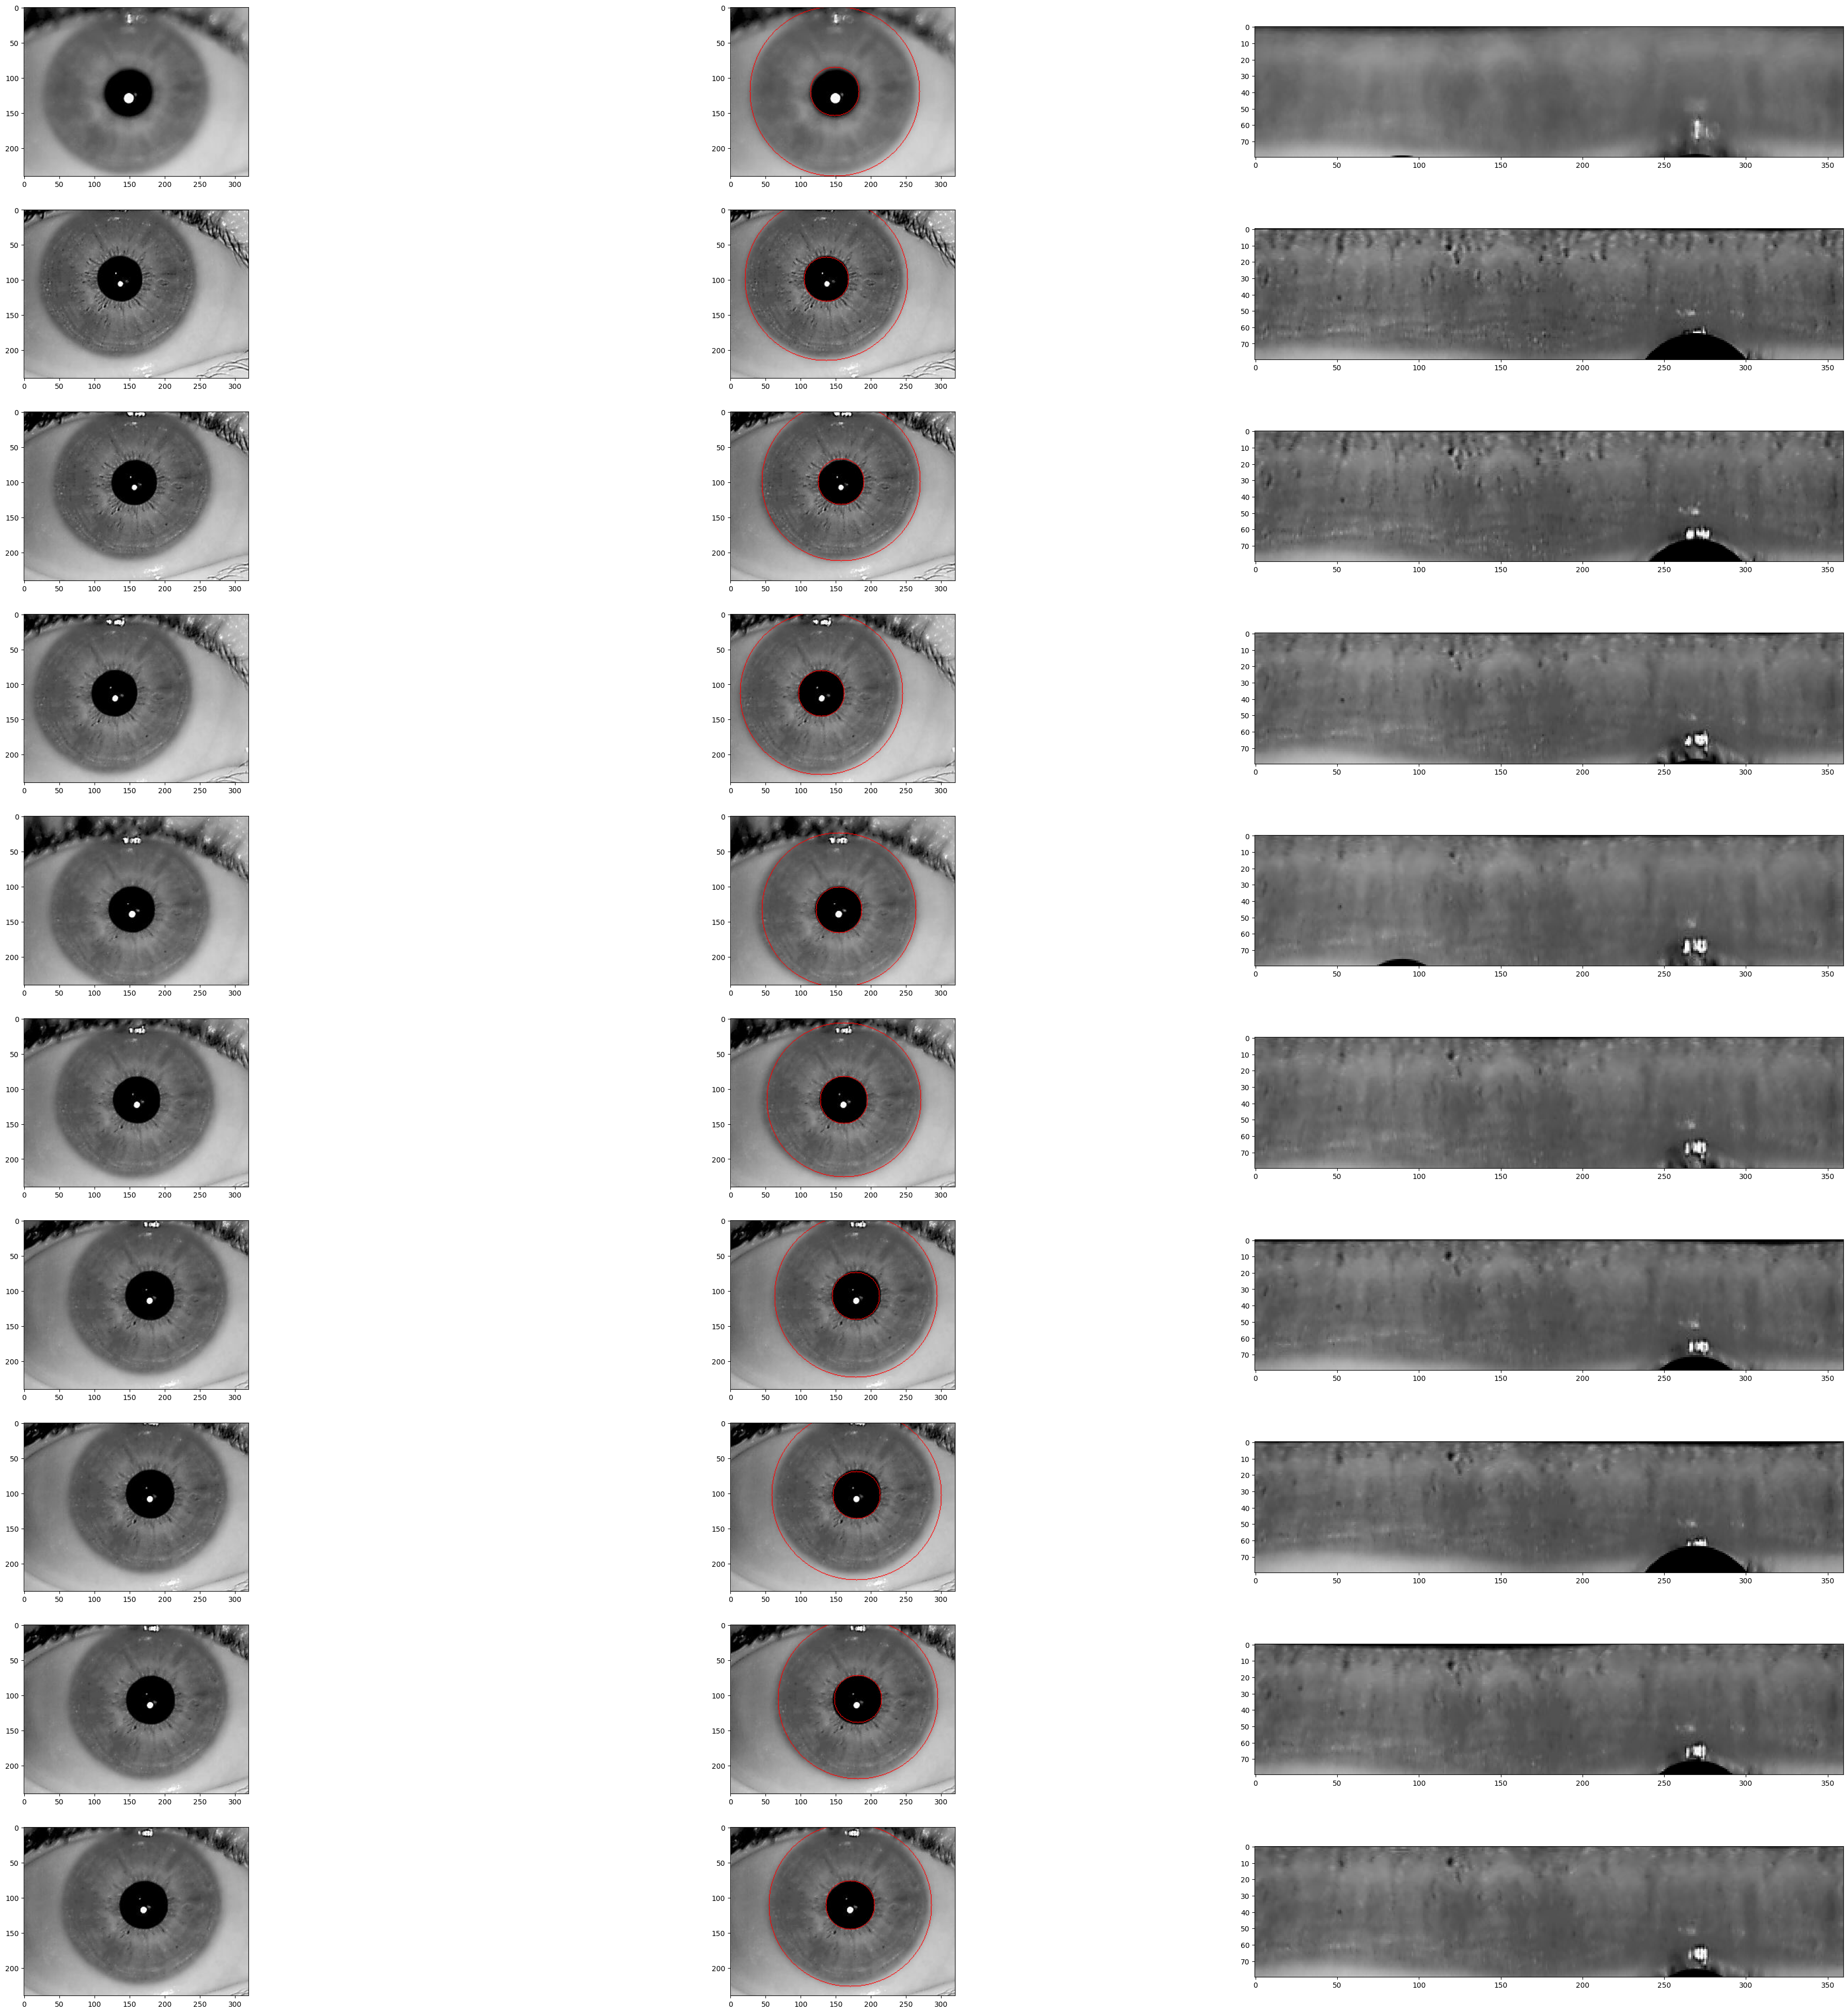

In [4]:
import numpy as np
import os
import cv2

centroid = (0, 0)

radius = 0

currentEye = 0

eyesList = []

def getNewEye(list):
    global currentEye
    if currentEye >= len(list):
        currentEye = 0
        return -1
    newEye = list[currentEye]
    currentEye += 1
    return newEye



base = 'D:/Downloads/IITD Database/IITD Database/003/'
eyesList = os.listdir(base)
key = 0
counter=1

plt.figure(figsize=(50,50))
while True:
    eye = getNewEye(eyesList)
    if (eye == -1):
        break
    frame = cv2.imread(base + eye,cv2.IMREAD_COLOR)

    plt.subplot(len(eyesList),3,counter)
    plt.imshow(frame)
    
    print(eye)


    normalized_image , output , pupil , iris  = get_output(frame)

    plt.subplot(len(eyesList), 3,counter+1)
    plt.imshow(output)

    plt.subplot(len(eyesList), 3,counter+2)
    plt.imshow(normalized_image)

    counter+=3

plt.savefig("out.png")


001  -  ['01_L.bmp', '02_L.bmp', '03_L.bmp', '04_L.bmp', '05_L.bmp', '06_L.bmp', '07_L.bmp', '08_L.bmp', '09_L.bmp', '10_L.bmp']
D:/Downloads/IITD Database/IITD Database/001/01_L.bmp
D:/Downloads/IITD Database/IITD Database/001/02_L.bmp
D:/Downloads/IITD Database/IITD Database/001/03_L.bmp
D:/Downloads/IITD Database/IITD Database/001/04_L.bmp
D:/Downloads/IITD Database/IITD Database/001/05_L.bmp
D:/Downloads/IITD Database/IITD Database/001/06_L.bmp
D:/Downloads/IITD Database/IITD Database/001/07_L.bmp
D:/Downloads/IITD Database/IITD Database/001/08_L.bmp
D:/Downloads/IITD Database/IITD Database/001/09_L.bmp
D:/Downloads/IITD Database/IITD Database/001/10_L.bmp
002  -  ['01_L.bmp', '02_L.bmp', '03_L.bmp', '04_L.bmp', '05_L.bmp', '06_L.bmp', '07_L.bmp', '08_L.bmp', '09_L.bmp', '10_L.bmp']
D:/Downloads/IITD Database/IITD Database/002/01_L.bmp
D:/Downloads/IITD Database/IITD Database/002/02_L.bmp
D:/Downloads/IITD Database/IITD Database/002/03_L.bmp
D:/Downloads/IITD Database/IITD Database

TypeError: object of type 'NoneType' has no len()

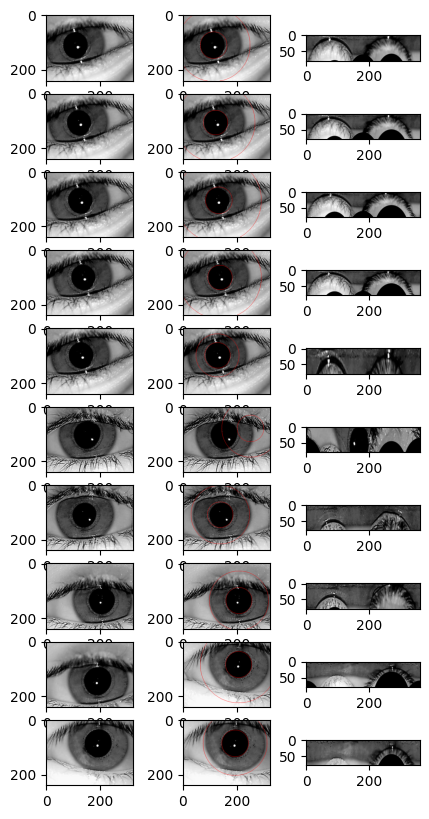

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,10))
base_path = "D:/Downloads/IITD Database/IITD Database/"


for root, folders, files in os.walk(base_path):
  
  dir = root.split("/")[-1]
  isNotSubject = dir == "" or dir[0].isalpha()
  
  if (isNotSubject):
    continue

  print(dir , " - " , files)

  counter = 1
  for (i, file_name) in enumerate(files):
    if ( not file_name.endswith(".bmp")):
      continue

    path = f"{base_path}{dir}/{file_name}"
    print(path)

    frame = cv2.imread(path,cv2.IMREAD_COLOR)
    plt.subplot( 10, 3, counter )
    plt.imshow(frame)

    normalized_image , output , pupil , iris  = get_output(frame)

    plt.subplot(10, 3, counter+1)
    plt.imshow(output)

    plt.subplot(10, 3, counter+2)
    plt.imshow(normalized_image)

    counter+=3

    plt.plot()


    


      
    
      



In [ ]:

from scipy import signal
from scipy.ndimage import convolve
from skimage.transform import radon
import numpy as np
import multiprocessing as mp

#########################################################################
#  Functions used to search the bounder of iris (inner and bounder)
#########################################################################


def searchInnerBound(img):
    """
    Searching of the boundary (inner) of the iris
    """

    # integro-differential
    Y = img.shape[0]
    X = img.shape[1]
    sect = X/4 		
    minrad = 10
    maxrad = sect*0.8
    jump = 4 		# Precision of the search

    # Hough Space
    sz = np.array([np.floor((Y-2*sect)/jump),
                    np.floor((X-2*sect)/jump),
                    np.floor((maxrad-minrad)/jump)]).astype(int)

    #circular integration
    integrationprecision = 1
    angs = np.arange(0, 2*np.pi, integrationprecision)
    x, y, r = np.meshgrid(np.arange(sz[1]),
                          np.arange(sz[0]),
                          np.arange(sz[2]))
    y = sect + y*jump
    x = sect + x*jump
    r = minrad + r*jump
    hs = ContourIntegralCircular(img, y, x, r, angs)

    # Hough Space Partial Derivative 
    hspdr = hs - hs[:, :, np.insert(np.arange(hs.shape[2]-1), 0, 0)]

    # blurring the image
    sm = 3
    hspdrs = signal.fftconvolve(hspdr, np.ones([sm,sm,sm]), mode="same")

    indmax = np.argmax(hspdrs.ravel())
    y,x,r = np.unravel_index(indmax, hspdrs.shape)

    inner_y = sect + y*jump
    inner_x = sect + x*jump
    inner_r = minrad + (r-1)*jump

    # Integro-Differential 
    integrationprecision = 0.1
    angs = np.arange(0, 2*np.pi, integrationprecision)
    x, y, r = np.meshgrid(np.arange(jump*2),
                          np.arange(jump*2),
                          np.arange(jump*2))
    y = inner_y - jump + y
    x = inner_x - jump + x
    r = inner_r - jump + r
    hs = ContourIntegralCircular(img, y, x, r, angs)

    # Hough Space Partial Derivative 
    hspdr = hs - hs[:, :, np.insert(np.arange(hs.shape[2]-1), 0, 0)]

    # blurring the image
    sm = 3 	
    hspdrs = signal.fftconvolve(hspdr, np.ones([sm,sm,sm]), mode="same")
    indmax = np.argmax(hspdrs.ravel())
    y,x,r = np.unravel_index(indmax, hspdrs.shape)

    inner_y = inner_y - jump + y
    inner_x = inner_x - jump + x
    inner_r = inner_r - jump + r - 1

    return inner_y, inner_x, inner_r


def searchOuterBound(img, inner_y, inner_x, inner_r):
    """
    Searching fo the boundary (outer) of the iris 
    """
    maxdispl = np.round(inner_r*0.15).astype(int)

    minrad = np.round(inner_r/0.8).astype(int)
    maxrad = np.round(inner_r/0.3).astype(int)

    # Integration region and avoiding eyelids
    intreg = np.array([[2/6, 4/6], [8/6, 10/6]]) * np.pi

    #circular integration
    integrationprecision = 0.05
    angs = np.concatenate([np.arange(intreg[0,0], intreg[0,1], integrationprecision),
                            np.arange(intreg[1,0], intreg[1,1], integrationprecision)],
                            axis=0)
    x, y, r = np.meshgrid(np.arange(2*maxdispl),
                          np.arange(2*maxdispl),
                          np.arange(maxrad-minrad))
    y = inner_y - maxdispl + y
    x = inner_x - maxdispl + x
    r = minrad + r
    hs = ContourIntegralCircular(img, y, x, r, angs)

    # Hough Space Partial Derivative
    hspdr = hs - hs[:, :, np.insert(np.arange(hs.shape[2]-1), 0, 0)]

    # blurring
    sm = 7 	# Size of the blurring mask
    hspdrs = signal.fftconvolve(hspdr, np.ones([sm, sm, sm]), mode="same")

    indmax = np.argmax(hspdrs.ravel())
    y, x ,r = np.unravel_index(indmax, hspdrs.shape)

    outer_y = inner_y - maxdispl + y + 1
    outer_x = inner_x - maxdispl + x + 1
    outer_r = minrad + r - 1

    return outer_y, outer_x, outer_r


def ContourIntegralCircular(imagen, y_0, x_0, r, angs):
    """
       Contour/circular integral using discrete rieman
    """
    y = np.zeros([len(angs), r.shape[0], r.shape[1], r.shape[2]], dtype=int)
    x = np.zeros([len(angs), r.shape[0], r.shape[1], r.shape[2]], dtype=int)
    for i in range(len(angs)):
        ang = angs[i]
        y[i, :, :, :] = np.round(y_0 - np.cos(ang) * r).astype(int)
        x[i, :, :, :] = np.round(x_0 + np.sin(ang) * r).astype(int)
    
    # adapt x and y
    ind = np.where(y < 0)
    y[ind] = 0
    ind = np.where(y >= imagen.shape[0])
    y[ind] = imagen.shape[0] - 1
    ind = np.where(x < 0)
    x[ind] = 0
    ind = np.where(x >= imagen.shape[1])
    x[ind] = imagen.shape[1] - 1

    hs = imagen[y, x]
    hs = np.sum(hs, axis=0)
    return hs.astype(float)

###############################################################################
#  Functions that segments regions of the image (iris, eyelids)
###############################################################################


def segment(eyeim, eyelashes_thres=80, use_multiprocess=True):
    """
        Segment the iris from the image
    """
    # Using daugman intefro-differential to the the iris
    # search the inner and outer bounds
    rowp, colp, rp = searchInnerBound(eyeim)
    row, col, r = searchOuterBound(eyeim, rowp, colp, rp)

    # pupil and iris boundaries
    rowp = np.round(rowp).astype(int)
    colp = np.round(colp).astype(int)
    rp = np.round(rp).astype(int)
    row = np.round(row).astype(int)
    col = np.round(col).astype(int)
    r = np.round(r).astype(int)
    cirpupil = [rowp, colp, rp]
    ciriris = [row, col, r]

    # top and bottom eyelid
    imsz = eyeim.shape
    irl = np.round(row - r).astype(int)
    iru = np.round(row + r).astype(int)
    icl = np.round(col - r).astype(int)
    icu = np.round(col + r).astype(int)
    if irl < 0:
        irl = 0
    if icl < 0:
        icl = 0
    if iru >= imsz[0]:
        iru = imsz[0] - 1
    if icu >= imsz[1]:
        icu = imsz[1] - 1
    imageiris = eyeim[irl: iru + 1, icl: icu + 1]

    # using muiltiprocessingh
    if use_multiprocess:
        ret_top = mp.Manager().dict()
        ret_bot = mp.Manager().dict()
        p_top = mp.Process(
            target=findTopEyelid,
            args=(imsz, imageiris, irl, icl, rowp, rp, ret_top),
        )
        p_bot = mp.Process(target=findBottomEyelid,
        args=(imsz, imageiris, rowp, rp, irl, icl, ret_bot),
        )
        p_top.start()
        p_bot.start()
        p_top.join()
        p_bot.join()
        mask_top = ret_top[0]
        mask_bot = ret_bot[0]
    else:
        mask_top = findTopEyelid(imsz, imageiris, irl, icl, rowp, rp)
        mask_bot = findBottomEyelid(imsz, imageiris, rowp, rp, irl, icl)

    # noise region we mark by NaN value
    imwithnoise = eyeim.astype(float)
    imwithnoise = imwithnoise + mask_top + mask_bot

    # For CASIA dataset, we need to eliminate eyelashes by threshold
    ref = eyeim < eyelashes_thres
    coords = np.where(ref == 1)
    imwithnoise[coords] = np.nan

    return ciriris, cirpupil, imwithnoise


# def findTopEyelid(imsz, imageiris, irl, icl, rowp, rp, ret_top=None):
#     """
#     Find and mask for the top eyelid region.
#     """
#     topeyelid = imageiris[0: rowp - irl - rp, :]
#     lines = findline(topeyelid)
#     mask = np.zeros(imsz, dtype=float)

#     if lines.size > 0:
#         xl, yl = linecoords(lines, topeyelid.shape)
#         yl = np.round(yl + irl - 1).astype(int)
#         xl = np.round(xl + icl - 1).astype(int)

#         yla = np.max(yl)
#         y2 = np.arange(yla)

#         mask[yl, xl] = np.nan
#         grid = np.meshgrid(y2, xl)
#         mask[grid] = np.nan

#     if ret_top is not None:
#         ret_top[0] = mask
#     return mask

def findTopEyelid(imsz, imageiris, irl, icl, rowp, rp, ret_top=None):
    """
    Find and mask for the top eyelid region.
    """
    topeyelid = imageiris[0: rowp - irl - rp, :]
    lines = findline(topeyelid)
    mask = np.zeros(imsz, dtype=float)

    if lines.size > 0:
        xl, yl = linecoords(lines, topeyelid.shape)
        # Adjust the coordinates relative to the full image
        yl = np.round(yl + irl - 1).astype(int)
        xl = np.round(xl + icl - 1).astype(int)

        # Clip indices to be within image bounds
        yl = np.clip(yl, 0, imsz[0] - 1)
        xl = np.clip(xl, 0, imsz[1] - 1)

        yla = np.max(yl)
        # Ensure yla does not exceed imsz[0]
        yla = min(yla, imsz[0] - 1)
        y2 = np.arange(yla)
        # Clip y2 as well (though np.arange should already be safe)
        y2 = np.clip(y2, 0, imsz[0] - 1)

        mask[yl, xl] = np.nan
        grid = np.meshgrid(y2, xl)
        # When using grid for advanced indexing, ensure each axis is clipped.
        grid0 = np.clip(grid[0], 0, imsz[0] - 1)
        grid1 = np.clip(grid[1], 0, imsz[1] - 1)
        mask[grid0, grid1] = np.nan

    if ret_top is not None:
        ret_top[0] = mask
    return mask




# def findBottomEyelid(imsz, imageiris, rowp, rp, irl, icl, ret_bot=None):
#     """
#     Find and mask for the bottom eyelid region.
#     """
#     bottomeyelid = imageiris[rowp - irl + rp - 1 : imageiris.shape[0], :]
#     lines = findline(bottomeyelid)
#     mask = np.zeros(imsz, dtype=float)

#     if lines.size > 0:
#         xl, yl = linecoords(lines, bottomeyelid.shape)
#         yl = np.round(yl + rowp + rp - 3).astype(int)
#         xl = np.round(xl + icl - 2).astype(int)
#         yla = np.min(yl)
#         y2 = np.arange(yla-1, imsz[0])

#         mask[yl, xl] = np.nan
#         grid = np.meshgrid(y2, xl)
#         mask[grid] = np.nan

#     if ret_bot is not None:
#         ret_bot[0] = mask
#     return mask


def findBottomEyelid(imsz, imageiris, rowp, rp, irl, icl, ret_bot=None):
    """
    Find and mask for the bottom eyelid region.
    """
    bottomeyelid = imageiris[rowp - irl + rp - 1 : imageiris.shape[0], :]
    lines = findline(bottomeyelid)
    mask = np.zeros(imsz, dtype=float)

    if lines.size > 0:
        xl, yl = linecoords(lines, bottomeyelid.shape)
        # Adjust the coordinates relative to the full image.
        yl = np.round(yl + rowp + rp - 3).astype(int)
        xl = np.round(xl + icl - 2).astype(int)

        # Clip indices to be within the image bounds.
        yl = np.clip(yl, 0, imsz[0] - 1)
        xl = np.clip(xl, 0, imsz[1] - 1)

        yla = np.min(yl)
        # Ensure that the starting index is at least 0.
        start_y = yla - 1 if yla - 1 >= 0 else 0
        y2 = np.arange(start_y, imsz[0])
        y2 = np.clip(y2, 0, imsz[0] - 1)

        # Set the eyelid mask.
        mask[yl, xl] = np.nan
        grid = np.meshgrid(y2, xl)
        grid0 = np.clip(grid[0], 0, imsz[0] - 1)
        grid1 = np.clip(grid[1], 0, imsz[1] - 1)
        mask[grid0, grid1] = np.nan

    if ret_bot is not None:
        ret_bot[0] = mask
    return mask




###############################################################################
#  Functions that manipulate lines in the image/eye
###############################################################################


def findline(img):
    """
    Find lines in the image using linear hough transformation and 
    canny detection
    """
    I2, orient = canny(img, 2, 0, 1)
    I3 = adjgamma(I2, 1.9)
    I4 = nonmaxsup(I3, orient, 1.5)
    edgeimage = hysthresh(I4, 0.2, 0.15)

    # Radon transformation
    theta = np.arange(180)
    R = radon(edgeimage, theta, circle=False)
    sz = R.shape[0] // 2
    xp = np.arange(-sz, sz+1, 1)

    maxv = np.max(R)
    if maxv > 25:
        i = np.where(R.ravel() == maxv)
        i = i[0]
    else:
        return np.array([])

    R_vect = R.ravel()
    ind = np.argsort(-R_vect[i])
    u = i.shape[0]
    k = i[ind[0: u]]
    y, x = np.unravel_index(k, R.shape)
    t = -theta[x] * np.pi / 180
    r = xp[y]

    lines = np.vstack([np.cos(t), np.sin(t), -r]).transpose()
    cx = img.shape[1] / 2 - 1
    cy = img.shape[0] / 2 - 1
    lines[:, 2] = lines[:, 2] - lines[:, 0]*cx - lines[:, 1]*cy
    return lines


def linecoords(lines, imsize):
    """
    Find x-, y- coordinates of positions along in a line.
    """
    xd = np.arange(imsize[1])
    yd = (-lines[0, 2] - lines[0, 0] * xd) / lines[0, 1]

    coords = np.where(yd >= imsize[0])
    coords = coords[0]
    yd[coords] = imsize[0]-1
    coords = np.where(yd < 0)
    coords = coords[0]
    yd[coords] = 0

    x = xd
    y = yd
    return x, y


def canny(im, sigma, vert, horz):
    """
    Canny edge detection.
    """
    def fspecial_gaussian(shape=(3, 3), sig=1):
        m, n = [(ss - 1) / 2 for ss in shape]
        y, x = np.ogrid[-m:m + 1, -n:n + 1]
        f = np.exp(-(x * x + y * y) / (2 * sig * sig))
        f[f < np.finfo(f.dtype).eps * f.max()] = 0
        sum_f = f.sum()
        if sum_f != 0:
            f /= sum_f
        return f

    hsize = [6 * sigma + 1, 6 * sigma + 1] 
    gaussian = fspecial_gaussian(hsize, sigma)
    im = convolve(im, gaussian, mode='constant')  
    rows, cols = im.shape

    h = np.concatenate([im[:, 1:cols], np.zeros([rows, 1])], axis=1) - \
        np.concatenate([np.zeros([rows, 1]), im[:, 0: cols - 1]], axis=1)

    v = np.concatenate([im[1: rows, :], np.zeros([1, cols])], axis=0) - \
        np.concatenate([np.zeros([1, cols]), im[0: rows - 1, :]], axis=0)

    d11 = np.concatenate([im[1:rows, 1:cols], np.zeros([rows - 1, 1])], axis=1)
    d11 = np.concatenate([d11, np.zeros([1, cols])], axis=0)
    d12 = np.concatenate([np.zeros([rows-1, 1]), im[0:rows - 1, 0:cols - 1]], axis = 1)
    d12 = np.concatenate([np.zeros([1, cols]), d12], axis=0)
    d1 = d11 - d12

    d21 = np.concatenate([im[0:rows - 1, 1:cols], np.zeros([rows - 1, 1])], axis = 1)
    d21 = np.concatenate([np.zeros([1, cols]), d21], axis=0)
    d22 = np.concatenate([np.zeros([rows - 1, 1]), im[1:rows, 0:cols - 1]], axis = 1)
    d22 = np.concatenate([d22, np.zeros([1, cols])], axis=0)
    d2 = d21 - d22

    X = (h + (d1 + d2) / 2) * vert
    Y = (v + (d1 - d2) / 2) * horz

    gradient = np.sqrt(X * X + Y * Y)  

    orient = np.arctan2(-Y, X)
    neg = orient < 0 
    orient = orient * ~neg + (orient + np.pi) * neg
    orient = orient * 180 / np.pi

    return gradient, orient


def adjgamma(im, g):
    """
    Adjust image gamma.
    """
    newim = im
    newim = newim - np.min(newim)
    newim = newim / np.max(newim)
    newim = newim ** (1 / g) 
    return newim


def nonmaxsup(in_img, orient, radius):
    """
    Perform non-maxima suppression on an image using an orientation image
    """
    rows, cols = in_img.shape
    im_out = np.zeros([rows, cols])
    iradius = np.ceil(radius).astype(int)

    # precalculatihg x and y offsets to relatives to the center piuxel
    angle = np.arange(181) * np.pi / 180 
    xoff = radius * np.cos(angle)
    yoff = radius * np.sin(angle)
    hfrac = xoff - np.floor(xoff)
    vfrac = yoff - np.floor(yoff)
    orient = np.fix(orient)

    # interpolating grey values of the center pixel for the nom maximal suppression
    col, row = np.meshgrid(np.arange(iradius, cols - iradius),
                           np.arange(iradius, rows - iradius))

    ori = orient[row, col].astype(int)
    x = col + xoff[ori]
    y = row - yoff[ori]
    # pixel locations that surround location x,y
    fx = np.floor(x).astype(int)
    cx = np.ceil(x).astype(int)
    fy = np.floor(y).astype(int)
    cy = np.ceil(y).astype(int)
    # integer pixel locations
    bl = in_img[cy, fx]  # bottom left
    br = in_img[cy, cx]  # bottom right
    tl = in_img[fy, fx]  # top left
    tr = in_img[fy, cx]  # top right
    # Bi-linear interpolation for x,y values
    upperavg = tl + hfrac[ori] * (tr - tl)
    loweravg = bl + hfrac[ori] * (br - bl)
    v1 = upperavg + vfrac[ori] * (loweravg - upperavg)

    # same thing but for the other side
    map_candidate_region = in_img[row, col] > v1
    x = col - xoff[ori]
    y = row + yoff[ori]
    fx = np.floor(x).astype(int)
    cx = np.ceil(x).astype(int)
    fy = np.floor(y).astype(int)
    cy = np.ceil(y).astype(int)
    tl = in_img[fy, fx]
    tr = in_img[fy, cx]
    bl = in_img[cy, fx]
    br = in_img[cy, cx]
    upperavg = tl + hfrac[ori] * (tr - tl)
    loweravg = bl + hfrac[ori] * (br - bl)
    v2 = upperavg + vfrac[ori] * (loweravg - upperavg)

    # max local
    map_active = in_img[row, col] > v2
    map_active = map_active * map_candidate_region
    im_out[row, col] = in_img[row, col] * map_active

    return im_out


def hysthresh(im, T1, T2):
    """
    Hysteresis thresholding.
    """
    rows, cols = im.shape
    rc = rows * cols
    rcmr = rc - rows
    rp1 = rows + 1

    bw = im.ravel() # column vector 
    pix = np.where(bw > T1)  # pixels with value > T1
    pix = pix[0]
    npix = pix.size         # pixels with value > T1

    # stack array
    stack = np.zeros(rows * cols)
    stack[0:npix] = pix         # add edge points on the stack
    stp = npix  
    for k in range(npix):
        bw[pix[k]] = -1        

    O = np.array([-1, 1, -rows - 1, -rows, -rows + 1, rows - 1, rows, rows + 1])

    while stp != 0:  # While the stack is != empty
        v = int(stack[stp-1])  
        stp -= 1

        if rp1 < v < rcmr:  # prevent illegal indices
            index = O + v  # indices of points around this pixel.
            for l in range(8):
                ind = index[l]
                if bw[ind] > T2:  # value > T2,
                    stp += 1  # add index onto the stack.
                    stack[stp-1] = ind
                    bw[ind] = -1 

    bw = (bw == -1)  # zero out that was not an edge
    bw = np.reshape(bw, [rows, cols])  # Reshaping the image
    
    return bw


#########################################################################
# Functions: normalize the image and help which finds the coordinates
# of a circle based on center/radius
#########################################################################


def normalize(image, x_iris, y_iris, r_iris, x_pupil, y_pupil, r_pupil,
              radpixels, angulardiv):
    """
    Turn a circular region into a rectangular block of NxN dimensions
    """
    radiuspixels = radpixels + 2
    angledivisions = angulardiv-1

    r = np.arange(radiuspixels)
    theta = np.linspace(0, 2*np.pi, angledivisions+1)

    # displacement of pupil and iris center
    ox = x_pupil - x_iris
    oy = y_pupil - y_iris

    if ox <= 0:
        sgn = -1
    elif ox > 0:
        sgn = 1

    if ox == 0 and oy > 0:
        sgn = 1

    a = np.ones(angledivisions+1) * (ox**2 + oy**2)

    if ox == 0:
        phi = np.pi/2
    else:
        phi = np.arctan(oy/ox)

    b = sgn * np.cos(np.pi - phi - theta)

    r = np.sqrt(a)*b + np.sqrt(a*b**2 - (a - r_iris**2))
    r = np.array([r - r_pupil])

    rmat = np.dot(np.ones([radiuspixels, 1]), r)

    rmat = rmat * np.dot(np.ones([angledivisions + 1, 1]), np.array([np.linspace(0, 1, radiuspixels)])).transpose()
    rmat = rmat + r_pupil

    # exclude teh boundarys of the pupil iris border 
    rmat = rmat[1:radiuspixels-1, :]

    # cartesian location of each point around the iris
    xcosmat = np.dot(np.ones([radiuspixels-2, 1]), np.array([np.cos(theta)]))
    xsinmat = np.dot(np.ones([radiuspixels-2, 1]), np.array([np.sin(theta)]))
    xo = rmat * xcosmat
    yo = rmat * xsinmat
    xo = x_pupil + xo
    xo = np.round(xo).astype(int)
    coords = np.where(xo >= image.shape[1])
    xo[coords] = image.shape[1] - 1
    coords = np.where(xo < 0)
    xo[coords] = 0
    
    yo = y_pupil - yo
    yo = np.round(yo).astype(int)
    coords = np.where(yo >= image.shape[0])
    yo[coords] = image.shape[0] - 1
    coords = np.where(yo < 0)
    yo[coords] = 0

    polar_array = image[yo, xo]
    polar_array = polar_array / 255

    # noise array with location of NaNs in polar_array
    polar_noise = np.zeros(polar_array.shape)
    coords = np.where(np.isnan(polar_array))
    polar_noise[coords] = 1

    # Get rid of outling points
    image[yo, xo] = 255

    # Get pixel coords for iris
    x, y = circlecoords([x_iris, y_iris], r_iris, image.shape)
    image[y, x] = 255

    xp, yp = circlecoords([x_pupil, y_pupil], r_pupil, image.shape)
    image[yp, xp] = 255

    # Replace NaNs before performing feature encoding
    coords = np.where((np.isnan(polar_array)))
    polar_array2 = polar_array
    polar_array2[coords] = 0.5
    avg = np.sum(polar_array2) / (polar_array.shape[0] * polar_array.shape[1])
    polar_array[coords] = avg

    return polar_array, polar_noise.astype(bool)


def circlecoords(c, r, imgsize, nsides=600):
    """
    Find the coordinates of a circle based on its centre and radius.
    """
    a = np.linspace(0, 2*np.pi, 2*nsides+1)
    xd = np.round(r * np.cos(a) + c[0])
    yd = np.round(r * np.sin(a) + c[1])

    # remove value bigger than the image
    xd2 = xd
    coords = np.where(xd >= imgsize[1])
    xd2[coords[0]] = imgsize[1] - 1
    coords = np.where(xd < 0)
    xd2[coords[0]] = 0

    yd2 = yd
    coords = np.where(yd >= imgsize[0])
    yd2[coords[0]] = imgsize[0] - 1
    coords = np.where(yd < 0)
    yd2[coords[0]] = 0

    x = np.round(xd2).astype(int)
    y = np.round(yd2).astype(int)
    return x, y

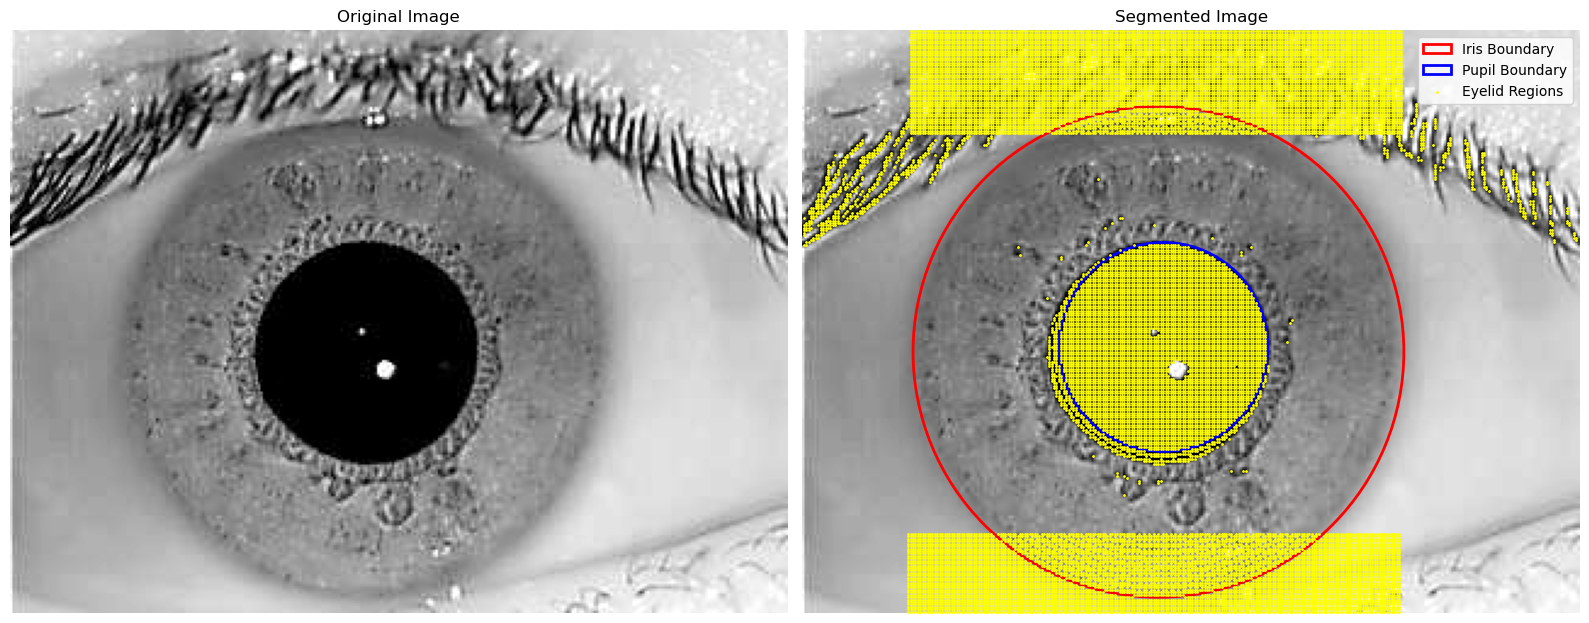

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


path = "D:/Downloads/IITD Database/IITD Database/001/02_L.bmp"
def plot_iris_segmentation(image_path):
    eyelashes_threshold = 30
    radial_resolution = 20
    angular_resolution = 240


    
    im = cv2.imread(image_path, 0)
    if im is None:
        raise ValueError("Image not found or path is incorrect.")
    

    ciriris, cirpupil, imwithnoise = segment(im, eyelashes_thres=eyelashes_threshold, use_multiprocess=False)

    arr_polar, arr_noise = normalize(imwithnoise, ciriris[1],  ciriris[0], ciriris[2], cirpupil[1], cirpupil[0], cirpupil[2], radial_resolution, angular_resolution)
    
    
    
    iris_center = (ciriris[1], ciriris[0])   
    iris_radius = ciriris[2]
    pupil_center = (cirpupil[1], cirpupil[0])  
    pupil_radius = cirpupil[2]
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    
    ax1.imshow(im, cmap='gray')
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    
    ax2.imshow(im, cmap='gray')
    
    
    iris_circle = plt.Circle(iris_center, iris_radius, color='red',
                             fill=False, linewidth=2, label='Iris Boundary')
    ax2.add_patch(iris_circle)
    
    
    pupil_circle = plt.Circle(pupil_center, pupil_radius, color='blue',
                              fill=False, linewidth=2, label='Pupil Boundary')
    ax2.add_patch(pupil_circle)
    
    
    eyelid_mask = np.isnan(imwithnoise)
    eyelid_y, eyelid_x = np.where(eyelid_mask)
    ax2.scatter(eyelid_x, eyelid_y, s=1, color='yellow', label='Eyelid Regions')
    
    ax2.set_title("Segmented Image")
    ax2.axis('off')
    
    
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()



plot_iris_segmentation(path)


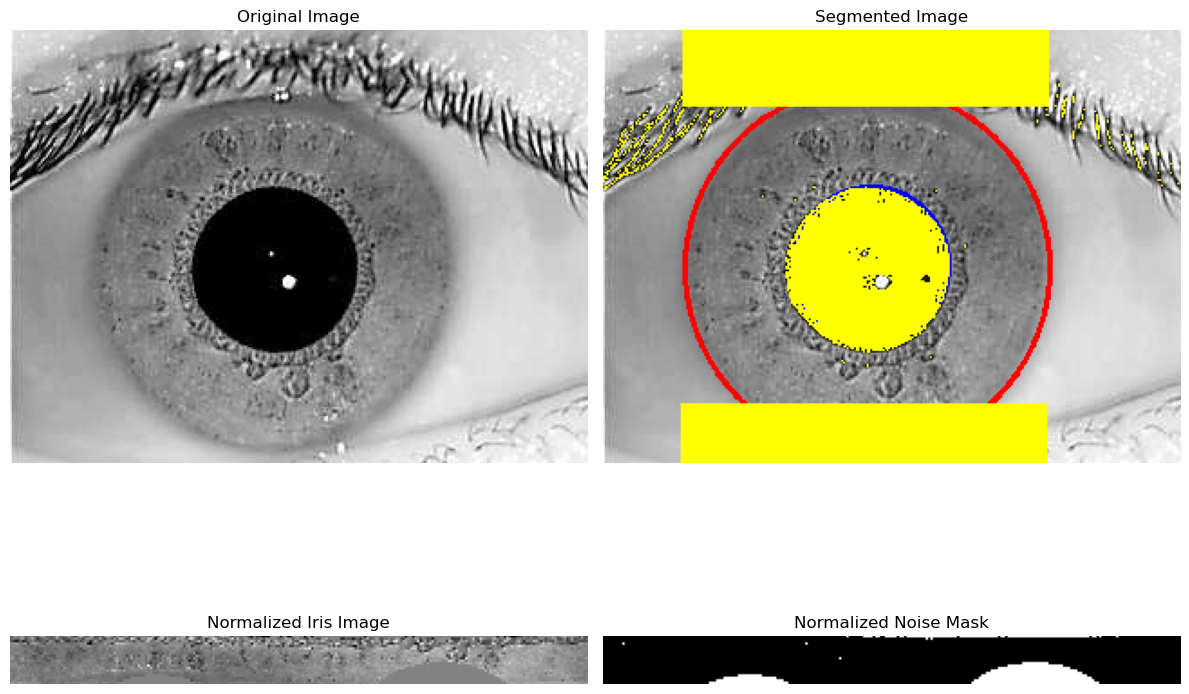

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot_iris_segmentation_and_normalization(image_path):

    eyelashes_threshold = 10
    radial_resolution = 20
    angular_resolution = 240

    original = cv2.imread(image_path, 0)
    if original is None:
        raise ValueError("Image not found or the path is incorrect.")
    

    ciriris, cirpupil, imwithnoise = segment(original, eyelashes_thres=eyelashes_threshold, use_multiprocess=False)
    


    segmented_overlay = cv2.cvtColor(original.copy(), cv2.COLOR_GRAY2BGR)
    

    iris_center = (int(ciriris[1]), int(ciriris[0]))  
    iris_radius = int(ciriris[2])
    pupil_center = (int(cirpupil[1]), int(cirpupil[0]))  
    pupil_radius = int(cirpupil[2])
    

    cv2.circle(segmented_overlay, iris_center, iris_radius, (0, 0, 255), 2) 
    cv2.circle(segmented_overlay, pupil_center, pupil_radius, (255, 0, 0), 2) 
    

    nan_indices = np.isnan(imwithnoise)
    segmented_overlay[nan_indices] = [0, 255, 255] 
    


    radial_resolution = 20  
    angular_resolution = 240 
    



    arr_polar, arr_noise = normalize(imwithnoise, 
                                     ciriris[1], ciriris[0], ciriris[2],
                                     cirpupil[1], cirpupil[0], cirpupil[2],
                                     radial_resolution, angular_resolution)
    


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    

    axs[0, 0].imshow(original, cmap='gray')
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis("off")
    


    segmented_rgb = cv2.cvtColor(segmented_overlay, cv2.COLOR_BGR2RGB)
    axs[0, 1].imshow(segmented_rgb)
    axs[0, 1].set_title("Segmented Image")
    axs[0, 1].axis("off")
    

    axs[1, 0].imshow(arr_polar, cmap="gray")
    axs[1, 0].set_title("Normalized Iris Image")
    axs[1, 0].axis("off")
    


    axs[1, 1].imshow(arr_noise, cmap="gray")
    axs[1, 1].set_title("Normalized Noise Mask")
    axs[1, 1].axis("off")
    
    plt.tight_layout()
    plt.show()

plot_iris_segmentation_and_normalization("D:/Downloads/IITD Database/IITD Database/001/02_L.bmp")
